In [118]:
# 导入模块
import os
import numpy as np
import tensorflow.keras as K
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
tf.compat.v1.disable_eager_execution()

In [119]:
data1 = pd.read_excel('C:/Users/admin/Desktop/睡眠结构_ALL.xlsx','Sheet1',index_col=0)
data1.to_csv('C:/Users/admin/Desktop/睡眠结构_ALL.csv',encoding='utf-8')
pima = pd.read_csv('C:/Users/admin/Desktop/睡眠结构_ALL.csv') 
clo_names = pima.columns.tolist()
print(clo_names)
to_show = clo_names[:6] + clo_names[-6:]
pima[:].head(3)

['编号', '性别', '年龄', '身高', '体重', '吸烟史', '饮酒史', '高血压病史', '糖尿病史', '高脂血症病史', '是否有新发脑梗死病灶', 'SDS', 'SAS', 'CTI', 'R期时长百分比', '浅睡时长百分比', '深睡时长百分比', 'Y（0为正常，1为紊乱）']


,编号,性别,年龄,身高,体重,吸烟史,饮酒史,高血压病史,糖尿病史,高脂血症病史,是否有新发脑梗死病灶,SDS,SAS,CTI,R期时长百分比,浅睡时长百分比,深睡时长百分比,Y（0为正常，1为紊乱）
0,202101,1,47,1.65,80,1,1,1,0,1,1,40,41,34,0.150,0.813,0.037,1
1,202101,1,47,1.65,80,1,1,1,0,1,1,40,41,34,0.266,0.613,0.121,1
2,202101,1,47,1.65,80,1,1,1,0,1,1,40,41,34,0.259,0.559,0.182,0


In [120]:
to_drop = ['编号','R期时长百分比','浅睡时长百分比','深睡时长百分比']
pima_01 = pima.drop(to_drop,axis=1)

In [121]:
pima_01.head
clo_names_01 = pima_01.columns.tolist
print(clo_names_01)
pima_01.shape

<bound method IndexOpsMixin.tolist of Index(['性别', '年龄', '身高', '体重', '吸烟史', '饮酒史', '高血压病史', '糖尿病史', '高脂血症病史',
       '是否有新发脑梗死病灶', 'SDS', 'SAS', 'CTI', 'Y（0为正常，1为紊乱）'],
      dtype='object')>


(135, 14)

In [122]:
pima_01.describe()

,性别,年龄,身高,体重,吸烟史,饮酒史,高血压病史,糖尿病史,高脂血症病史,是否有新发脑梗死病灶,SDS,SAS,CTI,Y（0为正常，1为紊乱）
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,1.340741,63.718519,1.655037,69.874074,0.562963,0.311111,0.629630,0.244444,0.355556,0.362963,41.162963,40.311111,20.562963,0.711111
std,0.475724,11.558193,0.079362,11.696683,0.497867,0.464672,0.484702,0.431358,0.480464,0.482645,8.018828,7.246684,7.223105,0.454934
min,1.000000,30.000000,1.500000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,28.000000,11.000000,0.000000
25%,1.000000,60.000000,1.600000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,36.000000,14.000000,0.000000
50%,1.000000,66.000000,1.650000,70.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,41.000000,40.000000,20.000000,1.000000
75%,2.000000,70.500000,1.700000,78.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,48.000000,46.000000,27.000000,1.000000
max,2.000000,81.000000,1.800000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,61.000000,37.000000,1.000000


In [123]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
X = pima_01.iloc[:, 0:13] # 特征列 0-12列，不含第13列
Y = pima_01.iloc[:, 13] # 目标列为第13列

In [158]:
X_features = pd.DataFrame(data = X, columns=(['性别','年龄','身高','体重','吸烟史','饮酒史','高血压病史','糖尿病史','高脂血症病史','是否有新发脑梗死病灶','SDS','SAS','CTI']))
X_features.head()
 
Y_features = pd.DataFrame(data =Y, columns=['Y（0为正常，1为紊乱）']) 
# 构造新特征DataFrame

In [159]:
# 将Y转成神经网络需要的数组结构
Y_01 = pd.get_dummies(Y).values

In [165]:
from sklearn.model_selection import train_test_split

seed = 5 #重现随机生成的训练
test_size = 0.25 #33%测试，67%训练
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_01, test_size=test_size, random_state=seed)

In [170]:
# 在再次训练之前重置训练
from keras import backend as back
curr_session = tf.compat.v1.get_default_session()
# close current session
if curr_session is not None:
    curr_session.close()
# reset graph
back.clear_session()
# create new session
s = tf.compat.v1.InteractiveSession()
tf.compat.v1.keras.backend.set_session(s)

In [171]:
# 定义模型
init = K.initializers.glorot_uniform(seed=1)
simple_adam = K.optimizers.Adam()
model = K.models.Sequential()
model.add(K.layers.Dense(units=16, input_dim=13, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=20, kernel_initializer=init, activation='relu'))
model.add(K.layers.Dense(units=2, kernel_initializer=init, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=simple_adam, metrics=['accuracy'])

In [172]:
# 训练模型
b_size = 1
max_epochs = 750
print("Starting training ")
h = model.fit(X_train, Y_train, batch_size=b_size, epochs=max_epochs, shuffle=True, verbose=1)
print("Training finished \n")

Starting training 
Train on 101 samples
Epoch 1/750
101/101 [==============================] - 0s 967us/sample - loss: 1.2322 - accuracy: 0.5743
Epoch 2/750
101/101 [==============================] - 0s 927us/sample - loss: 0.7246 - accuracy: 0.7228
Epoch 3/750
101/101 [==============================] - 0s 937us/sample - loss: 0.6337 - accuracy: 0.6931
Epoch 4/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.6491 - accuracy: 0.7030
Epoch 5/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.6482 - accuracy: 0.7228
Epoch 6/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.6338 - accuracy: 0.7327
Epoch 7/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.6625 - accuracy: 0.6931
Epoch 8/750
101/101 [==============================] - 0s 957us/sample - loss: 0.6227 - accuracy: 0.6832
Epoch 9/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.6643 - accuracy: 0.6931
Epoch 10/750
101/101 [===

101/101 [==============================] - 0s 1ms/sample - loss: 0.5435 - accuracy: 0.7129
Epoch 80/750
101/101 [==============================] - 0s 987us/sample - loss: 0.5195 - accuracy: 0.7426
Epoch 81/750
101/101 [==============================] - 0s 967us/sample - loss: 0.5439 - accuracy: 0.7228
Epoch 82/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.5278 - accuracy: 0.7723
Epoch 83/750
101/101 [==============================] - 0s 928us/sample - loss: 0.5243 - accuracy: 0.7822
Epoch 84/750
101/101 [==============================] - 0s 987us/sample - loss: 0.5390 - accuracy: 0.7228
Epoch 85/750
101/101 [==============================] - 0s 918us/sample - loss: 0.5238 - accuracy: 0.7525
Epoch 86/750
101/101 [==============================] - 0s 986us/sample - loss: 0.5262 - accuracy: 0.7624
Epoch 87/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.5206 - accuracy: 0.7129
Epoch 88/750
101/101 [==============================] - 0s 1ms/sa

101/101 [==============================] - 0s 1ms/sample - loss: 0.4673 - accuracy: 0.7921
Epoch 157/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4907 - accuracy: 0.7921
Epoch 158/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4825 - accuracy: 0.8119
Epoch 159/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4747 - accuracy: 0.7723
Epoch 160/750
101/101 [==============================] - 0s 997us/sample - loss: 0.4743 - accuracy: 0.8020
Epoch 161/750
101/101 [==============================] - 0s 987us/sample - loss: 0.4887 - accuracy: 0.7624
Epoch 162/750
101/101 [==============================] - 0s 947us/sample - loss: 0.4707 - accuracy: 0.7426
Epoch 163/750
101/101 [==============================] - 0s 967us/sample - loss: 0.4577 - accuracy: 0.7723
Epoch 164/750
101/101 [==============================] - 0s 2ms/sample - loss: 0.4953 - accuracy: 0.7921
Epoch 165/750
101/101 [==============================] - 0s 9

101/101 [==============================] - 0s 1ms/sample - loss: 0.4484 - accuracy: 0.8020
Epoch 234/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4454 - accuracy: 0.7723
Epoch 235/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4412 - accuracy: 0.7822
Epoch 236/750
101/101 [==============================] - 0s 953us/sample - loss: 0.4536 - accuracy: 0.8020
Epoch 237/750
101/101 [==============================] - 0s 934us/sample - loss: 0.4709 - accuracy: 0.7624
Epoch 238/750
101/101 [==============================] - 0s 978us/sample - loss: 0.4510 - accuracy: 0.8020
Epoch 239/750
101/101 [==============================] - 0s 997us/sample - loss: 0.4606 - accuracy: 0.7822
Epoch 240/750
101/101 [==============================] - 0s 977us/sample - loss: 0.4606 - accuracy: 0.7525
Epoch 241/750
101/101 [==============================] - 0s 957us/sample - loss: 0.4477 - accuracy: 0.7822
Epoch 242/750
101/101 [==============================] - 

101/101 [==============================] - 0s 1ms/sample - loss: 0.4304 - accuracy: 0.8119
Epoch 311/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4382 - accuracy: 0.7921
Epoch 312/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4360 - accuracy: 0.8119
Epoch 313/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4353 - accuracy: 0.7921
Epoch 314/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4124 - accuracy: 0.7723
Epoch 315/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4220 - accuracy: 0.7921
Epoch 316/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4334 - accuracy: 0.7822
Epoch 317/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4403 - accuracy: 0.7822
Epoch 318/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4361 - accuracy: 0.7525
Epoch 319/750
101/101 [==============================] - 0s 1ms/sampl

Epoch 388/750
101/101 [==============================] - 0s 987us/sample - loss: 0.4177 - accuracy: 0.7822
Epoch 389/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.4117 - accuracy: 0.7921
Epoch 390/750
101/101 [==============================] - 0s 957us/sample - loss: 0.4197 - accuracy: 0.8416
Epoch 391/750
101/101 [==============================] - 0s 984us/sample - loss: 0.4088 - accuracy: 0.7822
Epoch 392/750
101/101 [==============================] - 0s 928us/sample - loss: 0.4166 - accuracy: 0.7921
Epoch 393/750
101/101 [==============================] - 0s 903us/sample - loss: 0.4184 - accuracy: 0.8020
Epoch 394/750
101/101 [==============================] - 0s 886us/sample - loss: 0.4134 - accuracy: 0.8020
Epoch 395/750
101/101 [==============================] - 0s 894us/sample - loss: 0.3974 - accuracy: 0.7921
Epoch 396/750
101/101 [==============================] - 0s 893us/sample - loss: 0.4033 - accuracy: 0.8020
Epoch 397/750
101/101 [================

101/101 [==============================] - 0s 918us/sample - loss: 0.3834 - accuracy: 0.8119
Epoch 465/750
101/101 [==============================] - 0s 957us/sample - loss: 0.3769 - accuracy: 0.7822
Epoch 466/750
101/101 [==============================] - 0s 966us/sample - loss: 0.4112 - accuracy: 0.8119
Epoch 467/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3930 - accuracy: 0.7822
Epoch 468/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3905 - accuracy: 0.8218
Epoch 469/750
101/101 [==============================] - 0s 997us/sample - loss: 0.4059 - accuracy: 0.7723
Epoch 470/750
101/101 [==============================] - 0s 888us/sample - loss: 0.3840 - accuracy: 0.7723
Epoch 471/750
101/101 [==============================] - 0s 898us/sample - loss: 0.4222 - accuracy: 0.7921
Epoch 472/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3941 - accuracy: 0.8020
Epoch 473/750
101/101 [==============================] - 

101/101 [==============================] - 0s 1ms/sample - loss: 0.3923 - accuracy: 0.7822
Epoch 542/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3717 - accuracy: 0.8020
Epoch 543/750
101/101 [==============================] - 0s 997us/sample - loss: 0.3880 - accuracy: 0.8119
Epoch 544/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3919 - accuracy: 0.8119
Epoch 545/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3904 - accuracy: 0.7921
Epoch 546/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3754 - accuracy: 0.8119
Epoch 547/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3901 - accuracy: 0.7921
Epoch 548/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3807 - accuracy: 0.8119
Epoch 549/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3861 - accuracy: 0.7822
Epoch 550/750
101/101 [==============================] - 0s 1ms/sam

101/101 [==============================] - 0s 1ms/sample - loss: 0.3718 - accuracy: 0.7525
Epoch 619/750
101/101 [==============================] - 0s 977us/sample - loss: 0.3892 - accuracy: 0.7822
Epoch 620/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3654 - accuracy: 0.8020
Epoch 621/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3717 - accuracy: 0.8020
Epoch 622/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3849 - accuracy: 0.8119
Epoch 623/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3754 - accuracy: 0.8119
Epoch 624/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3851 - accuracy: 0.8020
Epoch 625/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3867 - accuracy: 0.8218
Epoch 626/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3812 - accuracy: 0.8119
Epoch 627/750
101/101 [==============================] - 0s 1ms/sam

101/101 [==============================] - 0s 918us/sample - loss: 0.3607 - accuracy: 0.7822
Epoch 695/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3772 - accuracy: 0.8020
Epoch 696/750
101/101 [==============================] - 0s 947us/sample - loss: 0.3602 - accuracy: 0.8218
Epoch 697/750
101/101 [==============================] - 0s 838us/sample - loss: 0.3659 - accuracy: 0.7723
Epoch 698/750
101/101 [==============================] - 0s 848us/sample - loss: 0.3644 - accuracy: 0.7822
Epoch 699/750
101/101 [==============================] - 0s 888us/sample - loss: 0.3740 - accuracy: 0.8020
Epoch 700/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3687 - accuracy: 0.7723
Epoch 701/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3606 - accuracy: 0.8020
Epoch 702/750
101/101 [==============================] - 0s 1ms/sample - loss: 0.3701 - accuracy: 0.8020
Epoch 703/750
101/101 [==============================] - 0s

In [173]:
# 评估模型
eval = model.evaluate(X_test, Y_test, verbose=0)
print("Evaluation on test data: loss = %0.6f accuracy = %0.2f%% \n" \
          % (eval[0], eval[1] * 100) )

Evaluation on test data: loss = 0.406017 accuracy = 85.29% 



In [174]:
# 使用模型进行预测
Y_pred = model.predict(X_test)
Y_pred

array([[1.2021354e-02, 9.8797870e-01],
       [6.9555978e-04, 9.9930441e-01],
       [7.0575705e-05, 9.9992943e-01],
       [3.1335619e-03, 9.9686641e-01],
       [1.8288501e-04, 9.9981719e-01],
       [2.2641703e-02, 9.7735834e-01],
       [9.9423158e-01, 5.7683955e-03],
       [1.6148712e-16, 1.0000000e+00],
       [1.6148712e-16, 1.0000000e+00],
       [9.1096583e-05, 9.9990892e-01],
       [1.2021354e-02, 9.8797870e-01],
       [8.3023369e-01, 1.6976635e-01],
       [6.9555978e-04, 9.9930441e-01],
       [9.9522614e-01, 4.7738310e-03],
       [3.7536490e-01, 6.2463510e-01],
       [7.7665824e-01, 2.2334173e-01],
       [2.2174977e-04, 9.9977821e-01],
       [4.3425593e-01, 5.6574410e-01],
       [8.9958280e-01, 1.0041712e-01],
       [1.5378668e-03, 9.9846220e-01],
       [9.9423158e-01, 5.7683955e-03],
       [6.5918947e-03, 9.9340808e-01],
       [9.9522614e-01, 4.7738310e-03],
       [3.7305143e-01, 6.2694854e-01],
       [9.9406898e-01, 5.9310468e-03],
       [3.2175237e-01, 6.

In [175]:
Y_pred_class = np.argmax(Y_pred, axis=1)  #其实就是记录每个数组中值最大的数的index
Y_pred_class

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [176]:
Y_test_class = np.argmax(Y_test, axis=1)  #其实就是记录每个数组中值最大的数的index
Y_test_class

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [177]:
X_test

,性别,年龄,身高,体重,吸烟史,饮酒史,高血压病史,糖尿病史,高脂血症病史,是否有新发脑梗死病灶,SDS,SAS,CTI
92,1,70,1.65,60,1,0,1,0,0,1,33,40,11
134,1,66,1.63,65,1,1,0,0,1,0,48,32,22
10,1,66,1.70,78,0,1,0,0,0,0,26,34,26
49,2,64,1.65,70,1,0,1,0,0,0,35,36,16
72,2,77,1.60,80,0,0,1,0,1,0,51,43,23
21,1,60,1.60,57,1,1,1,0,0,0,42,37,28
25,1,30,1.68,69,1,0,0,1,1,0,42,40,30
109,2,68,1.50,62,0,0,1,0,0,0,53,58,21
107,2,68,1.50,62,0,0,1,0,0,0,53,58,21
42,1,67,1.68,69,0,0,0,0,0,0,48,41,27


In [178]:
from sklearn.metrics import classification_report
report = classification_report(Y_test_class, Y_pred_class)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.91      0.88      0.89        24

    accuracy                           0.85        34
   macro avg       0.82      0.84      0.83        34
weighted avg       0.86      0.85      0.85        34



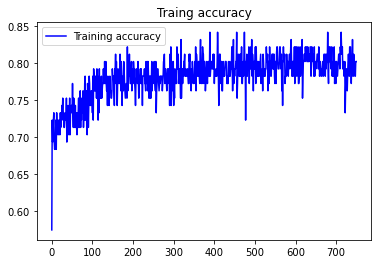

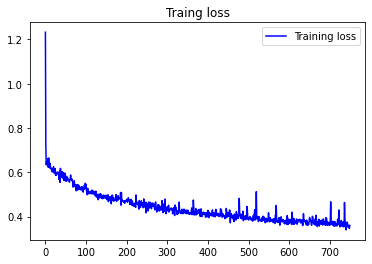

In [179]:
# 绘制loss、accuracy曲线
from matplotlib import pyplot as plt 

epochs=range(len(h.history['accuracy']))
plt.figure()
plt.plot(epochs,h.history['accuracy'],'b',label='Training accuracy')
plt.title('Traing accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,h.history['loss'],'b',label='Training loss')
plt.title('Traing loss')
plt.legend()